<a href="https://colab.research.google.com/github/Yusuprozimemet/GPS-Uyghur/blob/main/Distance_admixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distance

In [1]:
import numpy as np
from scipy.spatial.distance import euclidean, cosine, cityblock

# Your DNA sample
my_dna = np.array([
    0.079379189, -0.030380196, -0.0091829756, -0.00029236963, 0.042263359,
    0.027694675, 0.0040502444, -0.016659044, -0.0034230615, -0.0074728121,
    -0.017890748, 0.0060643285, 0.0062547518, -0.0045216424, 0.0017852059,
    -0.0052592319, -0.014154852, -0.0010963758, 0.002410809, -0.0021449476,
    0.0033248158, 0.002242483, 0.0044704541, 0.0038794304, 0.00058544855
])

# Source DNA data
data = """Siberian_Hunter_Gatherer_ANE,0.0393068,-0.374121,0.1021494,0.013845933,-0.10049033,-0.047597267,-0.0017232667,0.000061533333,0.0078537333,-0.0027943333,0.0021977333,-0.0013988,0.0038650667,-0.024056467,0.00070566667,-0.0013347333,-0.0042244,-0.00095446667,0.0095698,0.0153324,-0.0376752,0.0069906,0.0019966,-0.0077198,-0.006203
Eastern_European_Hunter_Gatherer,0.12975835,0.095558065,0.15857319,0.18247516,0.081285581,0.054599645,0.0016754194,0.015118548,0.03480871,-0.038222613,-0.00050293548,-0.016557903,0.02631771,-0.012421645,0.028746452,0.040461194,0.0012617097,0.0032857419,-0.0054292903,0.035646,0.044900613,0.012149903,-0.017906742,-0.082498935,0.0042181613
Zagros_Neolithic_Farmers,0.0430252,0.0674312,-0.153488,0.0055556,-0.1239616,0.0243752,0.015464,0.000277,-0.081605,-0.05427,-0.0032476,-0.0016186,0.0053816,-0.0078446,0.0319486,0.056775,-0.0058154,0.007576,0.014405,-0.0327406,0.0076614,-0.0300476,-0.0109198,-0.0387768,0.0229438
Caucasus_Hunter_Gatherer,0.08992,0.103584,-0.088246,-0.004845,-0.089555,0.020359,0.023266,-0.001154,-0.130486,-0.080002,-0.007632,0.024878,-0.052626,0.007707,0.026465,-0.0297,0.027772,-0.010769,-0.023757,0.037518,0.030945,-0.006677,0.0053,-0.020846,0.001557
Anatolia_Neolithic_Farmers,0.11916052,0.17889999,-0.0016487214,-0.10008064,0.0458314,-0.045371568,-0.0022518036,-0.0053594678,0.03129809,0.077550589,0.0079130464,0.012343029,-0.025136986,-0.00077466428,-0.041024303,-0.0094635035,0.022161072,0.00049532857,0.012148282,-0.011814735,-0.016778985,0.0037634357,-0.0047277822,-0.0026113535,-0.0054848036
Natufian_Hunter_Gatherer,0.029025,0.1431895,-0.031301,-0.1393755,0.0350835,-0.079344,-0.017861,-0.019384,0.113613,0.005558,0.030042,-0.020532,0.075891,-0.0004815,0.0117395,0.0079555,-0.0107565,-0.0008235,-0.019169,0.0319525,0.0055525,-0.000371,0.000913,-0.0013255,0.0058675
North_African_Neolithic_Farmer,-0.1735805,0.092413,-0.026398,-0.082365,0.030621,-0.0602405,-0.0794335,0.020538,0.1517565,0.005376,0.0208665,-0.025702,0.0747765,-0.045966,0.0671815,-0.032551,0.013364,-0.05701,-0.149455,0.0322025,-0.0400545,-0.117223,0.0815285,-0.009519,0.0212555"""

# Convert the string data into a dictionary of numpy arrays
source_samples = {}
for line in data.strip().split('\n'):
    parts = line.split(',')
    name = parts[0]
    values = np.array([float(x) for x in parts[1:]])
    source_samples[name] = values

# Function to calculate distances
def calculate_distances(sample, sources, metrics):
    distances = {}
    for name, source in sources.items():
        distances[name] = {
            'euclidean': euclidean(sample, source),
            'cosine': cosine(sample, source),
            'cityblock': cityblock(sample, source)
        }
    return distances

# Metrics to use
metrics = ['euclidean', 'cosine', 'cityblock']  # Manhattan distance is 'cityblock' in scipy

# Calculate distances
distances = calculate_distances(my_dna, source_samples, metrics)

# Sort by each metric to find the 5 closest samples
for metric in metrics:
    sorted_distances = sorted(distances.items(), key=lambda x: x[1][metric])
    print(f"\n5 closest samples based on {metric} distance:")
    for i, (sample_name, dists) in enumerate(sorted_distances[:5]):
        print(f"{i+1}. {sample_name} - {metric.capitalize()} distance: {dists[metric]}")



5 closest samples based on euclidean distance:
1. Caucasus_Hunter_Gatherer - Euclidean distance: 0.27316858687829854
2. Anatolia_Neolithic_Farmers - Euclidean distance: 0.2738309484916194
3. Zagros_Neolithic_Farmers - Euclidean distance: 0.27927384116897186
4. Natufian_Hunter_Gatherer - Euclidean distance: 0.2970226472485577
5. Eastern_European_Hunter_Gatherer - Euclidean distance: 0.31821148449497255

5 closest samples based on cosine distance:
1. Eastern_European_Hunter_Gatherer - Cosine distance: 0.7018411860460227
2. Siberian_Hunter_Gatherer_ANE - Cosine distance: 0.8134221010738836
3. Anatolia_Neolithic_Farmers - Cosine distance: 0.8724873286573638
4. Caucasus_Hunter_Gatherer - Cosine distance: 0.9130366875548365
5. Zagros_Neolithic_Farmers - Cosine distance: 1.0458738649227461

5 closest samples based on cityblock distance:
1. Anatolia_Neolithic_Farmers - Cityblock distance: 0.7852984083100001
2. Zagros_Neolithic_Farmers - Cityblock distance: 0.90254472528
3. Natufian_Hunter_Gat

# Admixture

# Optimization

In [2]:
# Your DNA sample
my_dna = np.array([
    0.079379189, -0.030380196, -0.0091829756, -0.00029236963, 0.042263359,
    0.027694675, 0.0040502444, -0.016659044, -0.0034230615, -0.0074728121,
    -0.017890748, 0.0060643285, 0.0062547518, -0.0045216424, 0.0017852059,
    -0.0052592319, -0.014154852, -0.0010963758, 0.002410809, -0.0021449476,
    0.0033248158, 0.002242483, 0.0044704541, 0.0038794304, 0.00058544855
])

# Source DNA data
data = """Siberian_Hunter_Gatherer,0.0393068,-0.374121,0.1021494,0.013845933,-0.10049033,-0.047597267,-0.0017232667,0.000061533333,0.0078537333,-0.0027943333,0.0021977333,-0.0013988,0.0038650667,-0.024056467,0.00070566667,-0.0013347333,-0.0042244,-0.00095446667,0.0095698,0.0153324,-0.0376752,0.0069906,0.0019966,-0.0077198,-0.006203
Eastern_European_Hunter_Gatherer,0.12975835,0.095558065,0.15857319,0.18247516,0.081285581,0.054599645,0.0016754194,0.015118548,0.03480871,-0.038222613,-0.00050293548,-0.016557903,0.02631771,-0.012421645,0.028746452,0.040461194,0.0012617097,0.0032857419,-0.0054292903,0.035646,0.044900613,0.012149903,-0.017906742,-0.082498935,0.0042181613
Zagros_Neolithic_Farmers,0.0430252,0.0674312,-0.153488,0.0055556,-0.1239616,0.0243752,0.015464,0.000277,-0.081605,-0.05427,-0.0032476,-0.0016186,0.0053816,-0.0078446,0.0319486,0.056775,-0.0058154,0.007576,0.014405,-0.0327406,0.0076614,-0.0300476,-0.0109198,-0.0387768,0.0229438
Caucasus_Hunter_Gatherer,0.08992,0.103584,-0.088246,-0.004845,-0.089555,0.020359,0.023266,-0.001154,-0.130486,-0.080002,-0.007632,0.024878,-0.052626,0.007707,0.026465,-0.0297,0.027772,-0.010769,-0.023757,0.037518,0.030945,-0.006677,0.0053,-0.020846,0.001557
Anatolia_Neolithic_Farmers,0.11916052,0.17889999,-0.0016487214,-0.10008064,0.0458314,-0.045371568,-0.0022518036,-0.0053594678,0.03129809,0.077550589,0.0079130464,0.012343029,-0.025136986,-0.00077466428,-0.041024303,-0.0094635035,0.022161072,0.00049532857,0.012148282,-0.011814735,-0.016778985,0.0037634357,-0.0047277822,-0.0026113535,-0.0054848036
Natufian_Hunter_Gatherer,0.029025,0.1431895,-0.031301,-0.1393755,0.0350835,-0.079344,-0.017861,-0.019384,0.113613,0.005558,0.030042,-0.020532,0.075891,-0.0004815,0.0117395,0.0079555,-0.0107565,-0.0008235,-0.019169,0.0319525,0.0055525,-0.000371,0.000913,-0.0013255,0.0058675
North_African_Neolithic_Farmer,-0.1735805,0.092413,-0.026398,-0.082365,0.030621,-0.0602405,-0.0794335,0.020538,0.1517565,0.005376,0.0208665,-0.025702,0.0747765,-0.045966,0.0671815,-0.032551,0.013364,-0.05701,-0.149455,0.0322025,-0.0400545,-0.117223,0.0815285,-0.009519,0.0212555"""


Optimization Results:
Explained Variance: 4.5%
Optimization Status: `xtol` termination condition is satisfied.

Significant Proportions:
 26.58%  Siberian_Hunter_Gatherer
 18.15%  Eastern_European_Hunter_Gatherer
 12.92%  Zagros_Neolithic_Farmers
  9.31%  Caucasus_Hunter_Gatherer
 26.66%  Anatolia_Neolithic_Farmers
  5.45%  Natufian_Hunter_Gatherer
  0.94%  North_African_Neolithic_Farmer


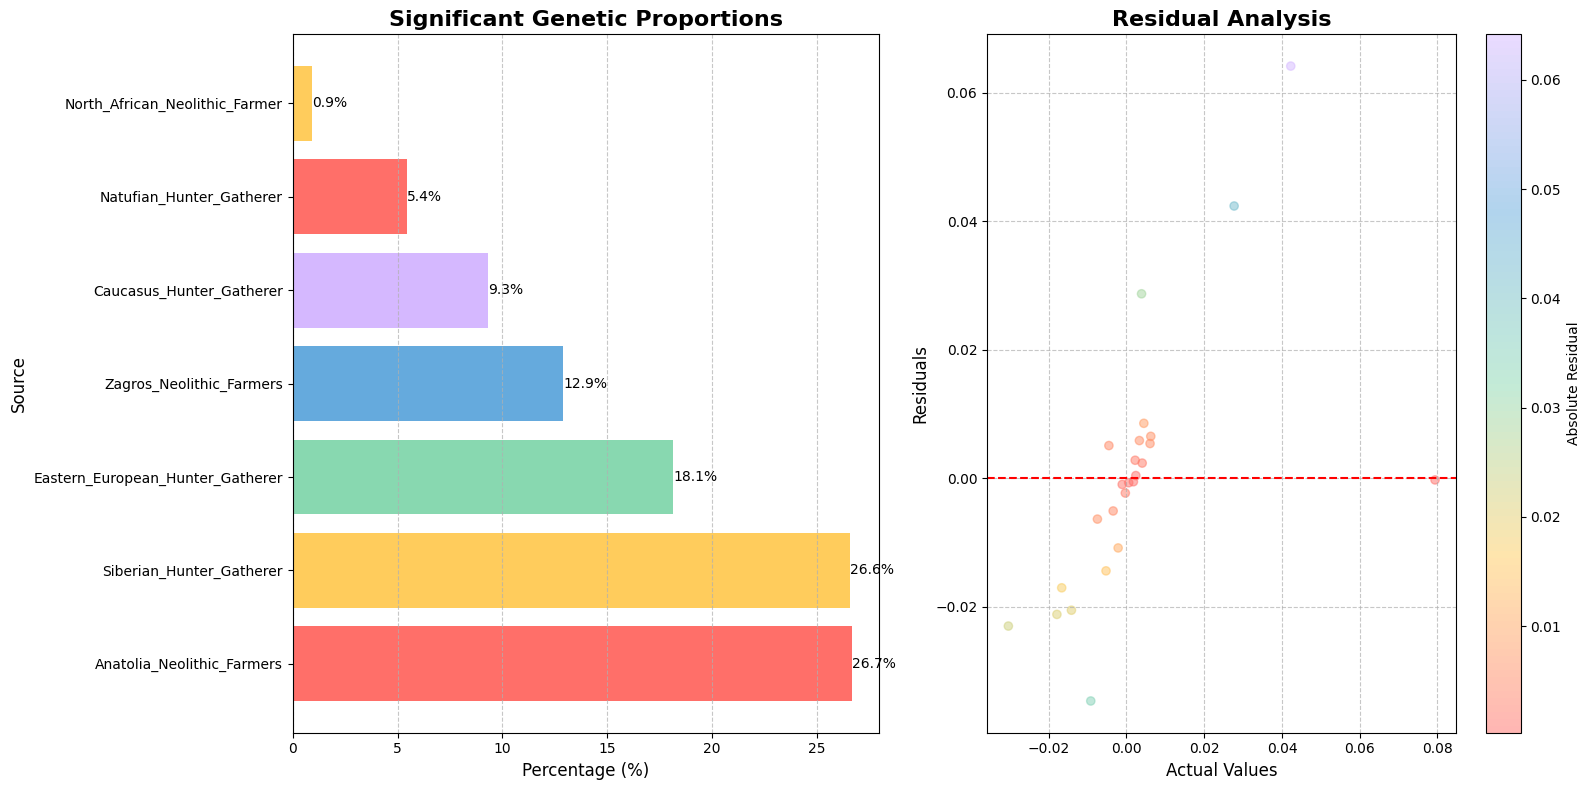

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib.colors import LinearSegmentedColormap
import warnings
import sys
import time
from threading import Thread, Event

def parse_source_data(data):
    """Parse genetic source data with validation"""
    lines = data.strip().split('\n')
    source_names = []
    source_vectors = []

    for i, line in enumerate(lines):
        parts = line.split(',')
        try:
            source_names.append(parts[0].strip())
            vector = [float(x) for x in parts[1:]]
            if len(vector) != 25:
                raise ValueError(f"Invalid vector length in line {i+1}")
            source_vectors.append(vector)
        except (ValueError, IndexError) as e:
            print(f"Error parsing line {i+1}: {e}")
            raise

    return np.array(source_names), np.array(source_vectors)

def objective_function(weights):
    """Enhanced objective function with multiple error metrics"""
    weights = np.clip(weights, 0, 1)  # Physical constraint
    weights /= weights.sum() + 1e-10  # Numerical stability

    predicted = source_matrix.T @ weights
    residuals = my_dna - predicted

    # Multi-metric error calculation
    distance = np.linalg.norm(residuals) / np.linalg.norm(my_dna) * 100  # Relative error
    mae = mean_absolute_error(my_dna, predicted)
    mse = mean_squared_error(my_dna, predicted)
    correlation = np.corrcoef(my_dna, predicted)[0,1]

    # Regularization terms
    entropy = -np.sum(weights * np.log(weights + 1e-10))  # Encourages reasonable sparsity
    l2_reg = 0.1 * np.sqrt(np.mean(weights**2))  # Prevents overfitting

    return distance + mae + mse - correlation + entropy + l2_reg

class Spinner:
    def __init__(self):
        self.spinner_chars = '|/-\\'
        self.stop_event = Event()

    def spin(self):
        i = 0
        while not self.stop_event.is_set():
            sys.stdout.write(f'\rOptimizing... {self.spinner_chars[i]}')
            sys.stdout.flush()
            time.sleep(0.1)
            i = (i + 1) % 4
        sys.stdout.write('\r' + ' ' * 20 + '\r')  # Clear spinner

    def __enter__(self):
        self.stop_event.clear()
        self.thread = Thread(target=self.spin)
        self.thread.daemon = True
        self.thread.start()
        return self

    def __exit__(self, *args):
        self.stop_event.set()
        self.thread.join()

# Suppress scipy warnings
warnings.filterwarnings('ignore', category=UserWarning, module='scipy.optimize')

def optimize_admixture():
    """Optimization with silent operation and progress indicator"""
    initial_guess = np.ones(len(source_names)) / len(source_names)

    with Spinner():
        result = minimize(
            objective_function,
            initial_guess,
            method='trust-constr',
            bounds=[(0, 1)] * len(source_names),
            constraints=(
                {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                {'type': 'ineq', 'fun': lambda x: x}
            ),
            options={'maxiter': 1000, 'verbose': 0, 'gtol': 1e-8, 'xtol': 1e-8}
        )

    return process_results(result)

def process_results(result):
    """Post-processing and validation of results"""
    # Remove full processing of zero percentages in result generation
    weights = result.x / result.x.sum()
    proportions = weights * 100

    # Threshold filtering of non-zero proportions
    threshold = 1e-2  # 0.01% threshold to filter out
    mask = proportions >= threshold

    # Statistical validation
    full_predicted = source_matrix.T @ weights
    residual = my_dna - full_predicted
    explained_variance = 1 - np.var(residual) / np.var(my_dna)

    # Filtered subset of sources used for visualization and reporting
    filtered_weights = weights[mask]
    filtered_source_matrix = source_matrix[mask].T

    # Results packaging with filtered data
    return {
        'full_weights': weights,
        'full_source_matrix': source_matrix,
        'weights': filtered_weights,
        'proportions': proportions[mask],
        'source_names': source_names[mask],
        'source_matrix': filtered_source_matrix,
        'stats': {
            'distance': result.fun,
            'explained_variance': explained_variance,
            'success': result.success,
            'message': result.message.decode() if isinstance(result.message, bytes) else result.message
        }
    }

def visualize_results(results):
    """Generate informative and aesthetically enhanced visualizations"""
    plt.figure(figsize=(16, 8))

    # Custom color palette for a more vibrant look
    colors = ['#ff6f69', '#ffcc5c', '#88d8b0', '#65aadd', '#d5b8ff']
    custom_cmap = LinearSegmentedColormap.from_list("custom", colors, N=100)

    # Proportions plot
    plt.subplot(121)
    sorted_idx = np.argsort(results['proportions'])[::-1]  # Sort by proportion in descending order
    bars = plt.barh(results['source_names'][sorted_idx], results['proportions'][sorted_idx], color=colors[:len(results['source_names'])])

    plt.title('Significant Genetic Proportions', fontsize=16, fontweight='bold')
    plt.xlabel('Percentage (%)', fontsize=12)
    plt.ylabel('Source', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Add value labels on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
                 va='center', ha='left', fontsize=10, color='black')

    # Residual analysis
    plt.subplot(122)
    # Use the full source matrix and weights for residual calculation
    full_predicted = results['full_source_matrix'].T @ results['full_weights']
    residual = my_dna - full_predicted

    scatter = plt.scatter(my_dna, residual, alpha=0.5, c=np.abs(residual), cmap=custom_cmap)
    plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
    plt.colorbar(scatter, label='Absolute Residual')

    plt.title('Residual Analysis', fontsize=16, fontweight='bold')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Run analysis pipeline
if __name__ == "__main__":
    source_names, source_matrix = parse_source_data(data)
    results = optimize_admixture()

    print("Optimization Results:")
    print(f"Explained Variance: {results['stats']['explained_variance']:.1%}")
    print(f"Optimization Status: {results['stats']['message']}")

    print("\nSignificant Proportions:")
    for name, prop in zip(results['source_names'], results['proportions']):
        print(f"{prop:>6.2f}%  {name}")

    visualize_results(results)